# ** Airline Passengers Problem **

# 1. Business Problem
    Forecast the Airlines Passengers data set. Prepare a document for each model explaining 
    how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
    Forecasting.

# 2. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
import statsmodels.formula.api as smf
import warnings
import itertools
import matplotlib.pyplot as plt
from matplotlib import pyplot
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
from pylab import rcParams
from datetime import datetime,time
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima_model import ARIMA

# 3. Data Collection and Description

In [2]:
airline_df = pd.read_excel('Airlines+Data.xlsx')
airline_df1 = airline_df.copy()
airline_df1.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [3]:
airline_df1.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [4]:
airline_df1.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [5]:
airline_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,96.0,213.708333,71.918216,104.0,156.0,200.0,264.75,413.0


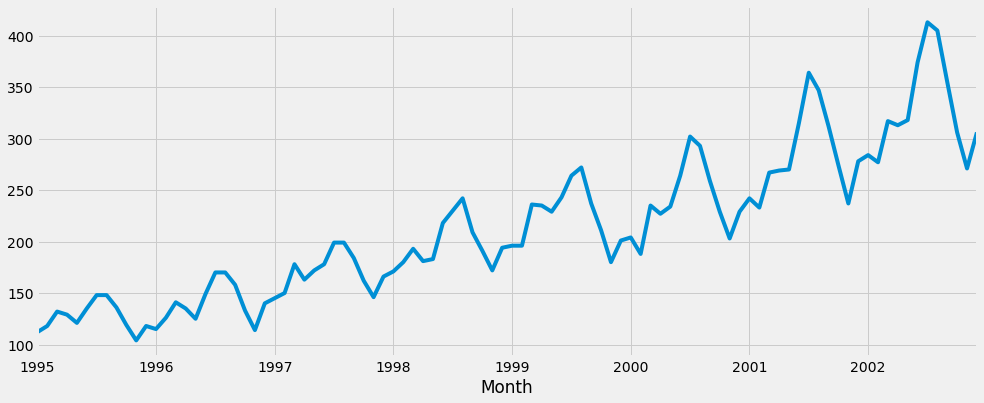

In [6]:
airline_df1 = airline_df1.set_index('Month')
airline_df1['Passengers'].plot(figsize= (15,6))
plt.show()

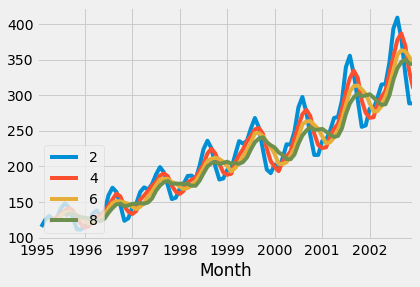

In [7]:
for i in range(2,10,2):
    airline_df1['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

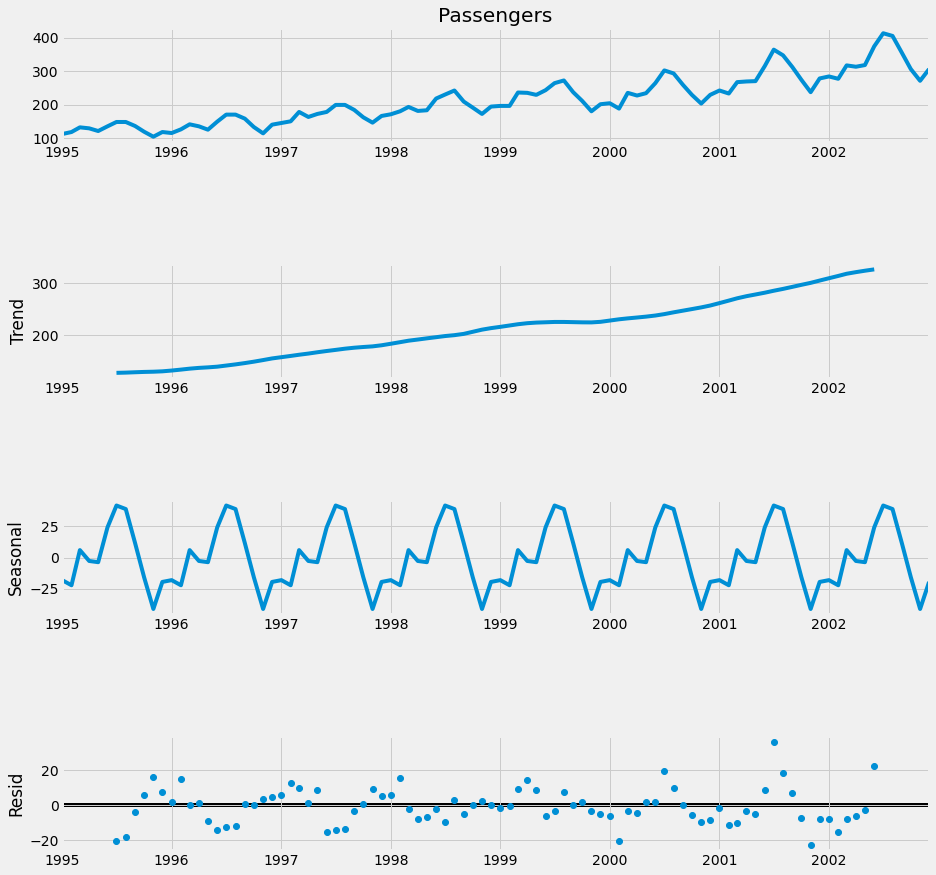

In [8]:
airline_ts_add = seasonal_decompose(airline_df1['Passengers'],model="additive")
airline_fig = airline_ts_add.plot()
airline_fig.set_figwidth(15)
airline_fig.set_figheight(15)
plt.show()

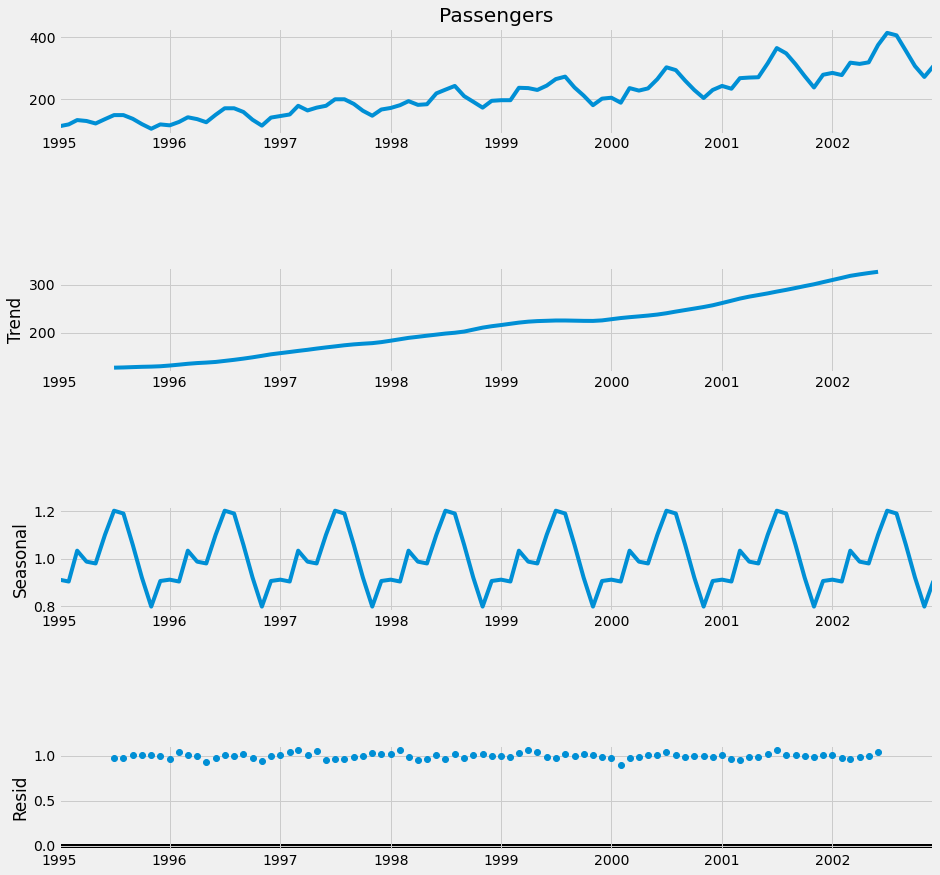

In [9]:
airline_ts_mul = seasonal_decompose(airline_df1.Passengers,model="multiplicative")
airline_fig = airline_ts_mul.plot()
airline_fig.set_figwidth(15)
airline_fig.set_figheight(15)
plt.show()

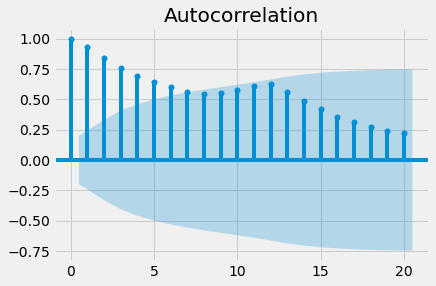

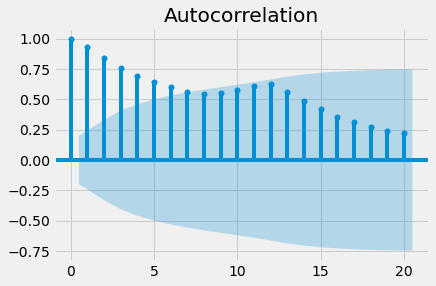

In [10]:
tsa_plots.plot_acf(airline_df1['Passengers'])

# 4. Building time series forecasting with ARIMA

In [11]:
airline_X = airline_df1['Passengers'].values
airline_size = int(len(airline_X)*0.66)
airline_train, airline_test = airline_X[0:airline_size], airline_X[airline_size:len(airline_X)]
airline_model = ARIMA(airline_train, order= (5,1,0))
airline_model_fit = airline_model.fit(disp = 0)
print(airline_model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   62
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -262.909
Method:                       css-mle   S.D. of innovations             16.748
Date:                Mon, 23 Aug 2021   AIC                            539.817
Time:                        20:55:11   BIC                            554.707
Sample:                             1   HQIC                           545.663
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7497      1.477      1.185      0.236      -1.145       4.644
ar.L1.D.y      0.0905      0.134      0.677      0.498      -0.171       0.352
ar.L2.D.y     -0.2096      0.135     -1.549      0.1

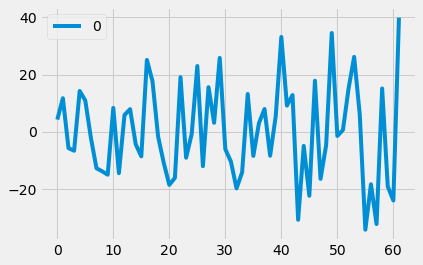

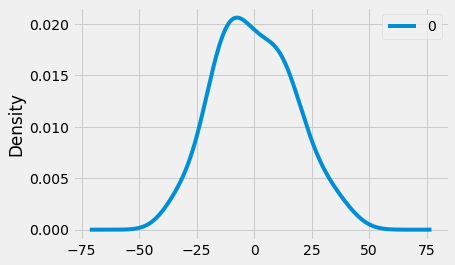

               0
count  62.000000
mean    0.057356
std    16.895802
min   -34.303296
25%   -12.610647
50%    -1.589474
75%    12.565602
max    39.955362


In [12]:
airline_residuals = pd.DataFrame(airline_model_fit.resid)
airline_residuals.plot()
pyplot.show()
airline_residuals.plot(kind='kde')
pyplot.show()
print(airline_residuals.describe())

# 5. Rolling forecast ARIMA model

In [13]:
airline_history = [x for x in airline_train]
airline_predictions = list()
for t in range(len(airline_test)):
    airline_rolling_model = ARIMA(airline_history, order=(5,1,0))
    airline_rolling_model_fit = airline_rolling_model.fit(disp=0)
    airline_output = airline_rolling_model_fit.forecast()
    airline_yhat = airline_output[0]
    airline_predictions.append(airline_yhat)
    airline_obs = airline_test[t]
    airline_history.append(airline_obs)
    print('predicted=%f, expected=%f' % (airline_yhat, airline_obs))

predicted=239.755183, expected=227.000000
predicted=220.737321, expected=234.000000
predicted=237.815011, expected=264.000000
predicted=252.750593, expected=302.000000
predicted=306.715786, expected=293.000000
predicted=285.374627, expected=259.000000
predicted=250.264002, expected=229.000000
predicted=227.093121, expected=203.000000
predicted=211.011456, expected=229.000000
predicted=253.260277, expected=242.000000
predicted=252.490675, expected=233.000000
predicted=234.042129, expected=267.000000
predicted=268.773620, expected=269.000000
predicted=261.782267, expected=270.000000
predicted=271.798049, expected=315.000000
predicted=314.422086, expected=364.000000
predicted=368.637726, expected=347.000000
predicted=334.957873, expected=312.000000
predicted=301.161836, expected=274.000000
predicted=265.936472, expected=237.000000
predicted=244.037200, expected=278.000000
predicted=312.961790, expected=284.000000
predicted=291.748136, expected=277.000000
predicted=284.551904, expected=317

In [14]:
airline_error = mean_squared_error(airline_test, airline_predictions)
print('Test MSE: %.3f' % airline_error)

Test MSE: 782.494


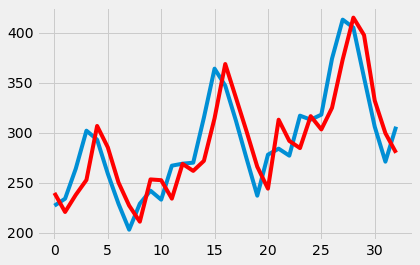

In [15]:
pyplot.plot(airline_test)
pyplot.plot(airline_predictions, color='red')
pyplot.show()

### A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red). We can see the values show same trend and are in the correct scale.

# 6. Comparing different model

In [16]:
airline_df2 = airline_df.copy()
airline_df2 = pd.get_dummies(airline_df2, columns = ['Month'])
airline_df2.head()

,Passengers,Month_1995-01-01 00:00:00,Month_1995-02-01 00:00:00,Month_1995-03-01 00:00:00,Month_1995-04-01 00:00:00,Month_1995-05-01 00:00:00,Month_1995-06-01 00:00:00,Month_1995-07-01 00:00:00,Month_1995-08-01 00:00:00,Month_1995-09-01 00:00:00,...,Month_2002-03-01 00:00:00,Month_2002-04-01 00:00:00,Month_2002-05-01 00:00:00,Month_2002-06-01 00:00:00,Month_2002-07-01 00:00:00,Month_2002-08-01 00:00:00,Month_2002-09-01 00:00:00,Month_2002-10-01 00:00:00,Month_2002-11-01 00:00:00,Month_2002-12-01 00:00:00
0,112,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,118,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,132,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,129,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,121,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
airline_df2 = airline_df2.rename({'Month_1995-01-01 00:00:00':'Month_01'}, axis=1)
airline_df2 = airline_df2.rename({'Month_1995-02-01 00:00:00':'Month_02'}, axis=1)
airline_df2 = airline_df2.rename({'Month_1995-03-01 00:00:00':'Month_03'}, axis=1)
airline_df2 = airline_df2.rename({'Month_1995-04-01 00:00:00':'Month_04'}, axis=1)
airline_df2 = airline_df2.rename({'Month_1995-05-01 00:00:00':'Month_05'}, axis=1)
airline_df2 = airline_df2.rename({'Month_1995-06-01 00:00:00':'Month_06'}, axis=1)
airline_df2 = airline_df2.rename({'Month_1995-07-01 00:00:00':'Month_07'}, axis=1)
airline_df2.head()

,Passengers,Month_01,Month_02,Month_03,Month_04,Month_05,Month_06,Month_07,Month_1995-08-01 00:00:00,Month_1995-09-01 00:00:00,...,Month_2002-03-01 00:00:00,Month_2002-04-01 00:00:00,Month_2002-05-01 00:00:00,Month_2002-06-01 00:00:00,Month_2002-07-01 00:00:00,Month_2002-08-01 00:00:00,Month_2002-09-01 00:00:00,Month_2002-10-01 00:00:00,Month_2002-11-01 00:00:00,Month_2002-12-01 00:00:00
0,112,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,118,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,132,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,129,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,121,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
airline_df2.shape

(96, 97)

In [19]:
airline_t = np.arange(1,97)
airline_df2['t'] = airline_t
airline_df2['t_sq'] = airline_df2['t'] * airline_df2['t']
airline_log_passengers = np.log(airline_df2['Passengers'])
airline_df2['log_passengers'] = airline_log_passengers
airline_df2.head()

,Passengers,Month_01,Month_02,Month_03,Month_04,Month_05,Month_06,Month_07,Month_1995-08-01 00:00:00,Month_1995-09-01 00:00:00,...,Month_2002-06-01 00:00:00,Month_2002-07-01 00:00:00,Month_2002-08-01 00:00:00,Month_2002-09-01 00:00:00,Month_2002-10-01 00:00:00,Month_2002-11-01 00:00:00,Month_2002-12-01 00:00:00,t,t_sq,log_passengers
0,112,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,4.718499
1,118,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,4.770685
2,132,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,4.882802
3,129,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,4.859812
4,121,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,5,25,4.795791


In [20]:
airline_train1, airline_test1 = np.split(airline_df2, [int(0.67 * len(airline_df2))])
airline_linear = smf.ols('Passengers ~ t', data=airline_train1).fit()
airline_predlin = pd.Series(airline_linear.predict(pd.DataFrame(airline_test1['t'])))
airline_rmselin = np.sqrt((np.mean(np.array(airline_test1['Passengers'])-np.array(airline_predlin))**2))
airline_rmselin

25.50398351648347

In [21]:
airline_quad=smf.ols('Passengers~t+t_sq',data=airline_train1).fit()
airline_predquad=pd.Series(airline_quad.predict(pd.DataFrame(airline_test1[['t','t_sq']])))
airline_rmsequad=np.sqrt(np.mean((np.array(airline_test1['Passengers'])-np.array(airline_predquad))**2))
airline_rmsequad

53.1895551441541

In [22]:
airline_expo=smf.ols('Passengers~t',data=airline_train1).fit()
airline_predexp=pd.Series(airline_expo.predict(pd.DataFrame(airline_test1['t'])))
airline_rmseexpo=np.sqrt(np.mean((np.array(airline_test1['Passengers'])-np.array(np.exp(airline_predexp)))**2))
airline_rmseexpo

1.6030945933279498e+128

In [23]:
airline_additive= smf.ols('Passengers~ Month_01+Month_02+Month_03+Month_04+Month_05+Month_06+Month_07',data=airline_train1).fit()
airline_predadd=pd.Series(airline_additive.predict(pd.DataFrame(airline_test1[['Month_01','Month_02','Month_03','Month_04','Month_05','Month_06','Month_07']])))
airline_rmseadd=np.sqrt(np.mean((np.array(airline_test1['Passengers'])-np.array(airline_predadd))**2))
airline_rmseadd

123.40630226761508

In [24]:
airline_addlinear= smf.ols('Passengers~ Month_01+Month_02+Month_03+Month_04+Month_05+Month_06+Month_07',data=airline_train1).fit()
airline_predaddlinear=pd.Series(airline_addlinear.predict(pd.DataFrame(airline_test1[['t','Month_01','Month_02','Month_03','Month_04','Month_05','Month_06','Month_07']])))
airline_rmseaddlinear=np.sqrt(np.mean((np.array(airline_test1['Passengers'])-np.array(airline_predaddlinear))**2))
airline_rmseaddlinear

123.40630226761508

In [25]:
airline_addquad=smf.ols('Passengers~t+t_sq+Month_01+Month_02+Month_03+Month_04+Month_05+Month_06+Month_07',data=airline_train1).fit()
airline_predaddquad=pd.Series(airline_addquad.predict(pd.DataFrame(airline_test1[['t','t_sq','Month_01','Month_02','Month_03','Month_04','Month_05','Month_06','Month_07']])))
airline_rmseaddquad=np.sqrt(np.mean((np.array(airline_test1['Passengers'])-np.array(airline_predaddquad))**2))
airline_rmseaddquad

70.21796086971924

In [26]:
airline_mulsea=smf.ols('log_passengers~Month_01+Month_02+Month_03+Month_04+Month_05+Month_06+Month_07',data=airline_train1).fit()
airline_predmul= pd.Series(airline_mulsea.predict(pd.DataFrame(airline_test1[['Month_01','Month_02','Month_03','Month_04','Month_05','Month_06','Month_07']])))
airline_rmsemul= np.sqrt(np.mean((np.array(airline_test1['Passengers'])-np.array(np.exp(airline_predmul)))**2))
airline_rmsemul

127.63442986452874

In [27]:
airline_mullin= smf.ols('log_passengers~t+Month_01+Month_02+Month_03+Month_04+Month_05+Month_06+Month_07',data=airline_train1).fit()
airline_predmullin= pd.Series(airline_mullin.predict(pd.DataFrame(airline_test1[['t','Month_01','Month_02','Month_03','Month_04','Month_05','Month_06','Month_07']])))
airline_rmsemulin=np.sqrt(np.mean((np.array(airline_test1['Passengers'])-np.array(np.exp(airline_predmullin)))**2))
airline_rmsemulin

41.360089381511024

In [28]:
airline_mul_quad= smf.ols('log_passengers~t+t_sq+Month_01+Month_02+Month_03+Month_04+Month_05+Month_06+Month_07',data=airline_train1).fit()
airline_pred_mul_quad= pd.Series(airline_mul_quad.predict(airline_test1[['t','t_sq','Month_01','Month_02','Month_03','Month_04','Month_05','Month_06','Month_07']]))
airline_rmse_mul_quad=np.sqrt(np.mean((np.array(airline_test1['Passengers'])-np.array(np.exp(airline_pred_mul_quad)))**2))
airline_rmse_mul_quad

83.57855053212096

# 7. Conclusion

In [29]:
airline_conclusion = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
          'Values':pd.Series([airline_rmse_mul_quad,airline_rmseadd,airline_rmseaddlinear,airline_rmseaddquad,airline_rmseexpo,airline_rmselin,airline_rmsemul,airline_rmsemulin,airline_rmsequad])}

In [30]:
airline_rmse=pd.DataFrame(airline_conclusion)
airline_rmse.sort_values(by='Values')

,Model,Values
5,rmselin,2.550398e+01
7,rmsemulin,4.136009e+01
8,rmsequad,5.318956e+01
3,rmseaddquad,7.021796e+01
0,rmse_mul_quad,8.357855e+01
1,rmseadd,1.234063e+02
2,rmseaddlinear,1.234063e+02
6,rmsemul,1.276344e+02
4,rmseexpo,1.603095e+128


### From above table we can conclude that for linear ARIMA model we get lowest root mean square error.

# ** CocaCola Sales Problem **

# 1. Business Problem
    Forecast the CocaCola Sales data set. Prepare a document for each model explaining 
    how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
    Forecasting.

# 2. Data Collection and Description

In [31]:
sale_df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
sale_df1 = sale_df.copy()
sale_df1.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [32]:
sale_df1.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [33]:
sale_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,42.0,2994.353308,977.930896,1547.818996,2159.714247,2782.376999,3609.25,5253.0


In [34]:
temp = sale_df1.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')
sale_df1['quater'] = pd.to_datetime(temp).dt.strftime('%b-%Y')
sale_df1.head()

,Quarter,Sales,quater
0,Q1_86,1734.827000,Jan-1986
1,Q2_86,2244.960999,Apr-1986
2,Q3_86,2533.804993,Jul-1986
3,Q4_86,2154.962997,Oct-1986
4,Q1_87,1547.818996,Jan-1987


In [35]:
sale_df1 = sale_df1.drop(['Quarter'], axis=1)
sale_df1.reset_index(inplace=True)
sale_df1['quater'] = pd.to_datetime(sale_df1['quater'])
sale_df1 = sale_df1.set_index('quater')
sale_df1.head()

,index,Sales
quater,,
1986-01-01,0,1734.827000
1986-04-01,1,2244.960999
1986-07-01,2,2533.804993
1986-10-01,3,2154.962997
1987-01-01,4,1547.818996


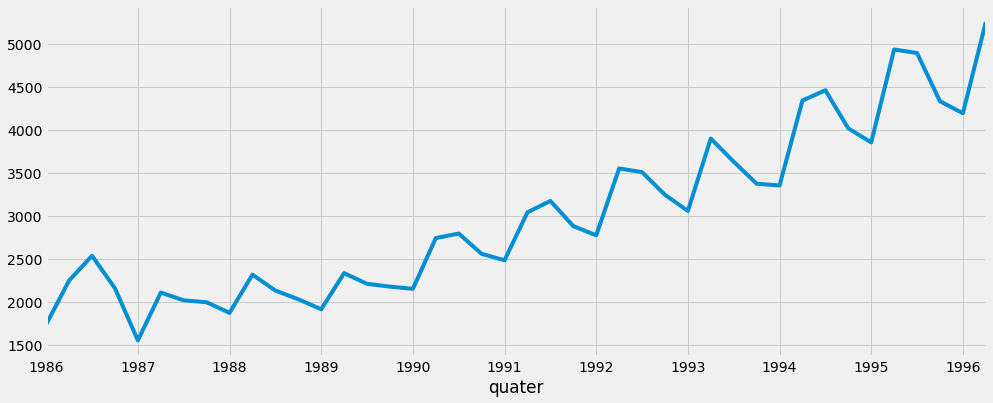

In [36]:
sale_df1['Sales'].plot(figsize=(15, 6))
plt.show()

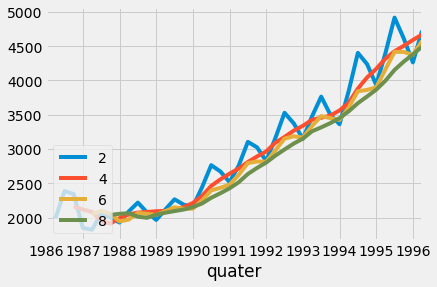

In [37]:
for i in range(2,10,2):
    sale_df1["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

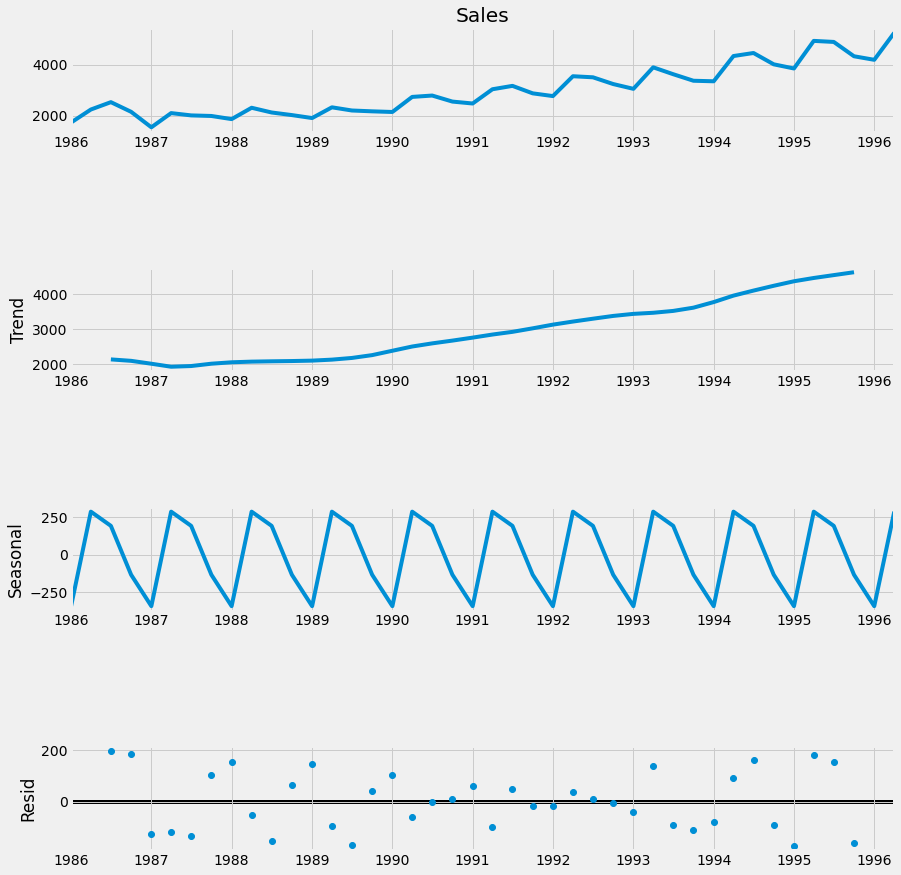

In [38]:
ts_add = seasonal_decompose(sale_df1.Sales,model="additive")
fig = ts_add.plot()
fig.set_figwidth(15)
fig.set_figheight(15)
plt.show()

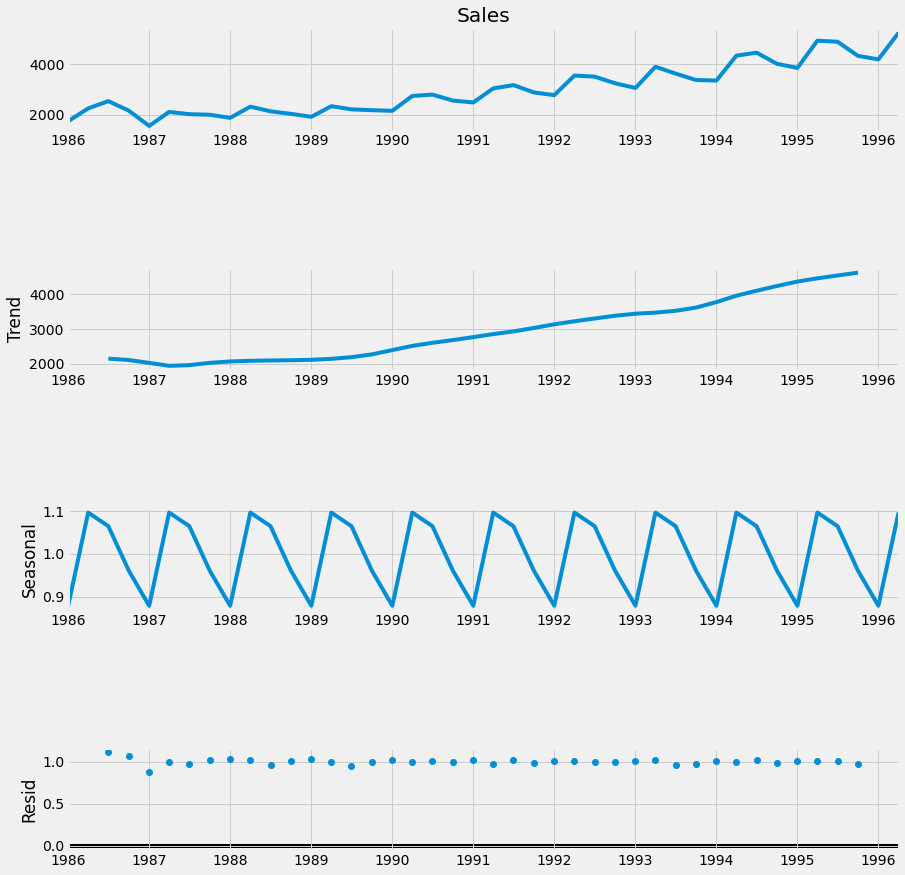

In [39]:
ts_mul = seasonal_decompose(sale_df1.Sales,model="multiplicative")
fig = ts_mul.plot()
fig.set_figwidth(15)
fig.set_figheight(15)
plt.show()

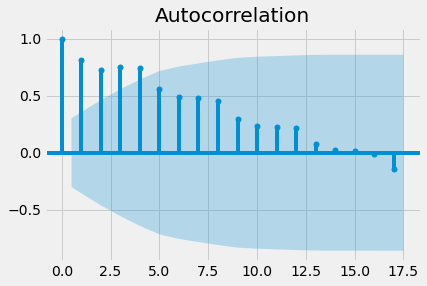

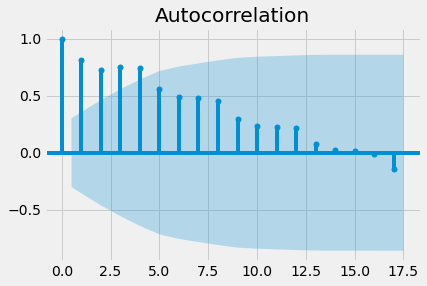

In [40]:
tsa_plots.plot_acf(sale_df1.Sales)

# 3. Building time series forecasting with ARIMA

In [41]:
sale_X = sale_df1['Sales'].values

In [42]:
sale_size = int(len(sale_X) * 0.66)
sale_train, sale_test = sale_X[0:sale_size], sale_X[sale_size:len(sale_X)]
sale_model = ARIMA(sale_train, order=(5,1,0))
sale_model_fit = sale_model.fit(disp=0)
print(sale_model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   26
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -172.036
Method:                       css-mle   S.D. of innovations            163.191
Date:                Mon, 23 Aug 2021   AIC                            358.071
Time:                        20:55:33   BIC                            366.878
Sample:                             1   HQIC                           360.607
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.8450     26.509      1.579      0.114     -10.111      93.801
ar.L1.D.y     -0.1479      0.195     -0.758      0.448      -0.530       0.234
ar.L2.D.y     -0.3127      0.157     -1.996      0.0

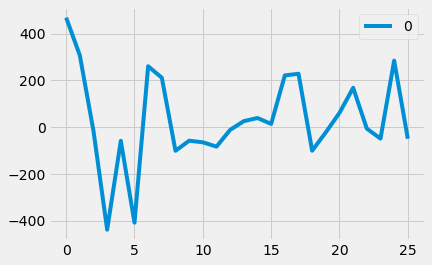

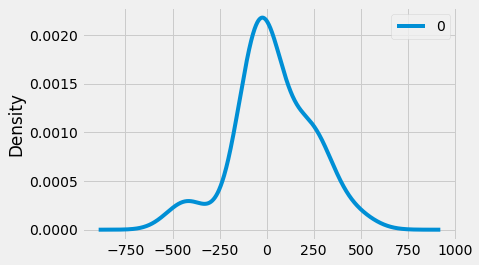

                0
count   26.000000
mean    31.323830
std    202.030060
min   -438.909568
25%    -58.604741
50%     -9.192260
75%    200.233974
max    468.289005


In [43]:
sale_residuals = pd.DataFrame(sale_model_fit.resid)
sale_residuals.plot()
pyplot.show()
sale_residuals.plot(kind='kde')
pyplot.show()
print(sale_residuals.describe())

# 4. Rolling forecast ARIMA model

In [44]:
sale_history = [x for x in sale_train]
sale_predictions = list()
for t in range(len(sale_test)):
    sale_model = ARIMA(sale_history, order=(5,1,0))
    sale_model_fit = sale_model.fit(disp=0)
    sale_output = sale_model_fit.forecast()
    sale_yhat = sale_output[0]
    sale_predictions.append(sale_yhat)
    sale_obs = sale_test[t]
    sale_history.append(sale_obs)
    print('predicted=%f, expected=%f' % (sale_yhat, sale_obs))

predicted=3135.588176, expected=3243.859993
predicted=3188.848967, expected=3056.000000
predicted=3734.223736, expected=3899.000000
predicted=3782.620076, expected=3629.000000
predicted=3355.124755, expected=3373.000000
predicted=3297.218859, expected=3352.000000
predicted=4112.815247, expected=4342.000000
predicted=3961.043652, expected=4461.000000
predicted=4130.787032, expected=4017.000000
predicted=3912.794314, expected=3854.000000
predicted=4687.043790, expected=4936.000000
predicted=4970.516543, expected=4895.000000
predicted=4384.039218, expected=4333.000000
predicted=4207.687346, expected=4194.000000
predicted=5261.673378, expected=5253.000000


In [45]:
sale_error = mean_squared_error(sale_test, sale_predictions)
print('Test MSE: %.3f' % sale_error)

Test MSE: 31525.217


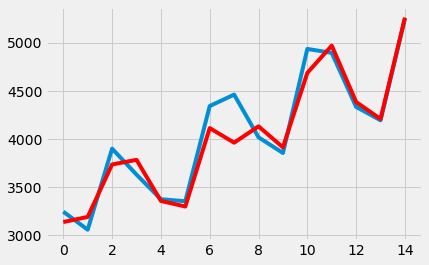

In [46]:
pyplot.plot(sale_test)
pyplot.plot(sale_predictions, color='red')
pyplot.show()

### A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red). We can see the values show some trend and are in the correct scale .

# 5. Comparing different model

In [47]:
sale_df2 = pd.get_dummies(sale_df, columns = ['Quarter'])

In [48]:
sale_df2.columns = ['Sales','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4']

In [49]:
sale_df2.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2154.962997,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
sale_t= np.arange(1,43)
sale_df2['t'] = sale_t
sale_df2['t_sq'] = sale_df2['t'] * sale_df2['t']
log_Sales=np.log(sale_df2['Sales'])
sale_df2['log_Sales']=log_Sales
sale_df2.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,t,t_sq,log_Sales
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,7.458663
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,7.716443
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,7.837477
3,2154.962997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,7.675529
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,25,7.344602


In [51]:
sale_train1, sale_test1 = np.split(sale_df2, [int(.67 *len(sale_df2))])

In [52]:
sale_linear= smf.ols('Sales ~ t',data=sale_train1).fit()
sale_predlin=pd.Series(sale_linear.predict(pd.DataFrame(sale_test1['t'])))
sale_rmselin=np.sqrt((np.mean(np.array(sale_test1['Sales'])-np.array(sale_predlin))**2))
sale_rmselin

580.1224130918632

In [53]:
sale_quad=smf.ols('Sales~t+t_sq',data=sale_train1).fit()
sale_predquad=pd.Series(sale_quad.predict(pd.DataFrame(sale_test1[['t','t_sq']])))
sale_rmsequad=np.sqrt(np.mean((np.array(sale_test1['Sales'])-np.array(sale_predquad))**2))
sale_rmsequad

783.729797503746

In [54]:
sale_expo=smf.ols('log_Sales~t',data=sale_train1).fit()
sale_predexp=pd.Series(sale_expo.predict(pd.DataFrame(sale_test1['t'])))
sale_rmseexpo=np.sqrt(np.mean((np.array(sale_test1['Sales'])-np.array(np.exp(sale_predexp)))**2))
sale_rmseexpo

588.1405104900199

In [55]:
sale_additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=sale_train1).fit()
sale_predadd=pd.Series(sale_additive.predict(pd.DataFrame(sale_test1[['Q1','Q2','Q3','Q4']])))
sale_rmseadd=np.sqrt(np.mean((np.array(sale_test1['Sales'])-np.array(sale_predadd))**2))
sale_rmseadd

1869.7188209186938

In [56]:
sale_addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=sale_train1).fit()
sale_predaddlinear=pd.Series(sale_addlinear.predict(pd.DataFrame(sale_test1[['t','Q1','Q2','Q3','Q4']])))
sale_rmseaddlinear=np.sqrt(np.mean((np.array(sale_test1['Sales'])-np.array(sale_predaddlinear))**2))
sale_rmseaddlinear

596.1526282372296

In [57]:
sale_addquad=smf.ols('Sales~t+t_sq+Q1+Q2+Q3+Q4',data=sale_train1).fit()
sale_predaddquad=pd.Series(sale_addquad.predict(pd.DataFrame(sale_test1[['t','t_sq','Q1','Q2','Q3','Q4']])))
sale_rmseaddquad=np.sqrt(np.mean((np.array(sale_test1['Sales'])-np.array(sale_predaddquad))**2))
sale_rmseaddquad

412.1144436052219

In [58]:
sale_mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=sale_train1).fit()
sale_predmul= pd.Series(sale_mulsea.predict(pd.DataFrame(sale_test1[['Q1','Q2','Q3','Q4']])))
sale_rmsemul= np.sqrt(np.mean((np.array(sale_test1['Sales'])-np.array(np.exp(sale_predmul)))**2))
sale_rmsemul

2374.919440795433

In [59]:
sale_mullin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=sale_train1).fit()
sale_predmullin= pd.Series(sale_mullin.predict(pd.DataFrame(sale_test1[['t','Q1','Q2','Q3','Q4']])))
sale_rmsemulin=np.sqrt(np.mean((np.array(sale_test1['Sales'])-np.array(np.exp(sale_predmullin)))**2))
sale_rmsemulin

5359.6879119332425

In [60]:
sale_mul_quad= smf.ols('log_Sales~t+t_sq+Q1+Q2+Q3+Q4',data=sale_train1).fit()
sale_pred_mul_quad= pd.Series(sale_mul_quad.predict(sale_test1[['t','t_sq','Q1','Q2','Q3','Q4']]))
sale_rmse_mul_quad=np.sqrt(np.mean((np.array(sale_test1['Sales'])-np.array(np.exp(sale_pred_mul_quad)))**2))
sale_rmse_mul_quad

3630.5619467339266

# 6. Conclusion

In [61]:
sale_conclusion = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
          'Values':pd.Series([sale_rmse_mul_quad,sale_rmseadd,sale_rmseaddlinear,sale_rmseaddquad,sale_rmseexpo,sale_rmselin,sale_rmsemul,sale_rmsemulin,sale_rmsequad])}

In [62]:
sale_rmse=pd.DataFrame(sale_conclusion)
sale_rmse.sort_values(by='Values')

,Model,Values
3,rmseaddquad,412.114444
5,rmselin,580.122413
4,rmseexpo,588.140510
2,rmseaddlinear,596.152628
8,rmsequad,783.729798
1,rmseadd,1869.718821
6,rmsemul,2374.919441
0,rmse_mul_quad,3630.561947
7,rmsemulin,5359.687912
